In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
os.chdir('C:\\Users\\DELL\\datasets')
dataset=pd.read_csv('preprocessed.csv')

In [6]:
dataset.head()

,Unnamed: 0,step,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_C,nameDest_C,nameDest_M
0,0,1,0,0,12.044359,11.984786,15.078545,0.000000,0.0,False,False,False,True,False,True,False,True
1,1,1,0,0,9.964112,9.872292,11.236082,0.000000,0.0,False,False,False,True,False,True,False,True
2,2,1,1,0,5.204007,0.000000,6.827017,0.000000,0.0,False,False,False,False,True,True,True,False
3,3,1,1,0,5.204007,0.000000,6.827017,17.076888,0.0,False,True,False,False,False,True,True,False
4,4,1,0,0,10.634773,10.305174,15.509614,0.000000,0.0,False,False,False,True,False,True,False,True


In [7]:
dataset['step'].unique
dataset['Unnamed: 0'].unique
df=dataset.drop(columns=['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','nameOrig_C',	'nameDest_C','nameDest_M','Unnamed: 0'],inplace=True)

In [8]:
dataset.head()

,step,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,0,0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,0,0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,1,0,5.204007,0.000000,6.827017,0.000000,0.0
3,1,1,0,5.204007,0.000000,6.827017,17.076888,0.0
4,1,0,0,10.634773,10.305174,15.509614,0.000000,0.0


In [9]:
y=dataset['isFraud']

In [10]:
x=dataset.drop(columns='isFlaggedFraud',inplace=True)

In [11]:
dataset.head(4)

,step,isFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,1,5.204007,0.000000,6.827017,0.000000,0.0
3,1,1,5.204007,0.000000,6.827017,17.076888,0.0


In [12]:
#Feature column 
x=dataset.iloc[:,:].values


In [13]:
x

array([[  1.        ,   0.        ,  12.04435927, ...,  15.0785449 ,
          0.        ,   0.        ],
       [  1.        ,   0.        ,   9.96411217, ...,  11.23608248,
          0.        ,   0.        ],
       [  1.        ,   1.        ,   5.20400669, ...,   6.82701721,
          0.        ,   0.        ],
       ...,
       [743.        ,   1.        ,  15.65786971, ...,  37.86440243,
         20.44826952,  37.91609101],
       [743.        ,   1.        ,  13.65299577, ...,  29.16896288,
          0.        ,   0.        ],
       [743.        ,   1.        ,  13.65299577, ...,  29.16896288,
         38.01299158,  38.60583262]])

In [14]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [15]:
#Data split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred=classifier.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
cm

array([[1588628,       0],
       [      0,    2027]], dtype=int64)

In [19]:
accuracy_score(y_test,y_pred)*100

100.0

DECISION TREE

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [21]:

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


(array([3.609667e+06, 8.020000e+02, 4.592000e+03, 2.360700e+04,
        1.232750e+05, 4.544470e+05, 8.656210e+05, 5.842720e+05,
        4.984990e+05, 1.978380e+05]),
 array([ 0.        ,  1.77191998,  3.54383995,  5.31575993,  7.0876799 ,
         8.85959988, 10.63151986, 12.40343983, 14.17535981, 15.94727978,
        17.71919976]),
 <BarContainer object of 10 artists>)

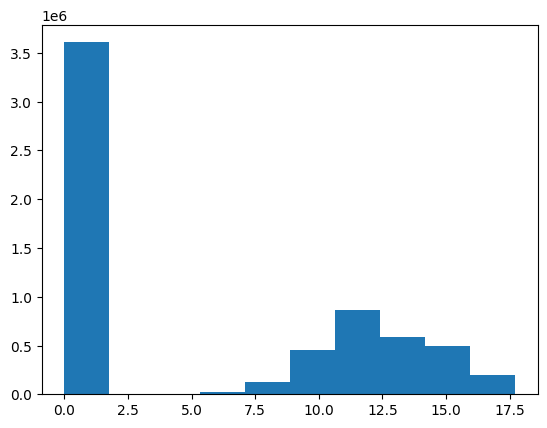

In [22]:
plt.hist(x=dataset.newbalanceOrig)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [24]:
x

array([[-1.70304158, -0.0359512 ,  0.81657593, ..., -0.95080365,
        -1.10917428, -1.20788099],
       [-1.70304158, -0.0359512 ,  0.44967348, ..., -1.68689315,
        -1.10917428, -1.20788099],
       [-1.70304158, 27.8154828 , -0.38988752, ..., -2.53152514,
        -1.10917428, -1.20788099],
       ...,
       [ 3.51012348, 27.8154828 ,  1.45390685, ...,  3.41421771,
         0.26152625,  1.34910128],
       [ 3.51012348, 27.8154828 ,  1.10029831, ...,  1.7484573 ,
        -1.10917428, -1.20788099],
       [ 3.51012348, 27.8154828 ,  1.10029831, ...,  1.7484573 ,
         1.43893512,  1.39561602]])

In [25]:
#Data split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
pip install tensorflow-gpu


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [59 lines of output]
      Traceback (most recent call last):
        File "C:\Users\DELL\AppData\Local\Temp\pip-build-env-ge3wwr9c\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\DELL\AppData\Local\Temp\pip-build-env-ge3wwr9c\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\DELL\AppData\Local\Temp\pip-build-env-ge3wwr9c\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _par

In [27]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
#initialize the ann
#import tensorflow as tf
ann=tf.keras.models.Sequential()

NameError: name 'tf' is not defined

In [ ]:
#Adding the input layer and the hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
#Adding the hidden layers
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
#adding the output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
#compiling the ann model
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
149124/149124 [==============================] - 429s 3ms/step - loss: 6.3467e-04 - accuracy: 1.0000
Epoch 2/100
149124/149124 [==============================] - 2641s 18ms/step - loss: 7.2689e-12 - accuracy: 1.0000
Epoch 3/100
149124/149124 [==============================] - 415s 3ms/step - loss: 5.2818e-12 - accuracy: 1.0000
Epoch 4/100
147879/149124 [============================>.] - ETA: 11s - loss: 4.2815e-12 - accuracy: 1.0000